In [1]:
1 + 1

2

In [15]:
#importing required values from .env file
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')

In [16]:
from langchain_openai import ChatOpenAI
model = ChatOpenAI(model="gpt-4o")

In [17]:
result = model.invoke("Hello")
result.content

'Hello! How can I assist you today?'

In [18]:
#creating an agent graph to create a blog generator

from typing_extensions import TypedDict
from langchain_core.messages import HumanMessage,SystemMessage
from typing import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages


In [27]:
#class to manage the state
class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

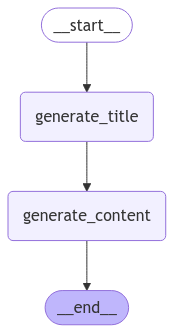

In [30]:
#creating agents

#generate title
# System message
sys_msg_title = SystemMessage(content="You are a helpful assistant tasked with generating suitable title for the requested information.")
def generate_title(state:MessageState):
    
    return {"messages": [model.invoke([sys_msg_title] + state["messages"])]}
#generate content
# System message
sys_msg_content = SystemMessage(content="You are a helpful assistant tasked with generating content for the requested information.")
def generate_content(state:MessageState):
    return {"messages": [model.invoke([sys_msg_content]+state["messages"])]}
from langgraph.graph import START,END,StateGraph
from IPython.display import Image, display
builder = StateGraph(MessageState)

builder.add_node("generate_title",generate_title)
builder.add_node("generate_content",generate_content)

#adding edges

builder.add_edge(START,"generate_title")
builder.add_edge("generate_title","generate_content")
builder.add_edge("generate_content",END)

Agent_blog_generator = builder.compile()

#view the graph
display(Image(Agent_blog_generator.get_graph().draw_mermaid_png()))

In [31]:
messages = [HumanMessage(content="What is Machine Learning?")]
messages = Agent_blog_generator.invoke({"messages": messages})

In [33]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is Machine Learning?
================================== Ai Message ==================================

"Introduction to Machine Learning: Concepts and Applications"
================================== Ai Message ==================================

Machine Learning (ML) is a subset of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to perform specific tasks without using explicit instructions. Instead, ML systems learn patterns and insights from data, which allows them to improve their performance automatically through experience.

### Key Concepts:

1. **Data**: The foundation of machine learning, data is used to train models. It can be structured (like databases) or unstructured (such as images or text).

2. **Algorithms**: These are the mathematical models and processes used to identify patterns within data. They enable predicti